# Projektarbeit
### Jens Ettl (Matrikelnr. 73397)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Motivation, Ziel & Daten

Fehlerhafte Produkte im Nachhinein zu identifizieren kann erhebliche Folgekosten mit sich bringen. Daher ist es erstrebenswert mangelhafte Produktqualität schon **so früh wie möglich** im Herstellungsprozess zu identifizieren.

Dieser Datensatz stammt aus der Stahlproduktion. Er enthält Informationen über Unregelmäßigkeiten auf der Oberfläche von Stahlplatten, die aus der Bildauswertung resultieren. Anhand dieser Unregelmäßigkeiten wollen wir erkennen, ob es sich nur um eine optische Beschädigung handelt ohne Auswirkung oder ob die Stahlplatte schwerwiegend fehlerhaft ist und nicht weiter genutzt werden sollte. Somit vermeiden wir, dass wir den Stahl verbauen und nachträglich ganze Produktreihen Fehler aufweisen, was Konsequenzen, wie zusätzliche Kosten, Imageabwertung etc. mit sich bringen kann. 

In [2]:
data = pd.read_csv("data/data_steel.csv")
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault
0,333,342,764107,764213,525,16,106,57020,95,127,...,0.5625,1.0000,1.0,2.7202,0.9542,2.0253,0.9151,-0.1515,0.9872,in Ordnung
1,1293,1316,600561,600841,2643,170,285,271889,44,125,...,0.1353,0.9825,1.0,3.4221,1.3617,2.4472,0.9179,-0.1963,1.0000,in Ordnung
2,1252,1264,1229599,1229628,269,22,29,26745,71,125,...,0.5454,1.0000,1.0,2.4297,1.0792,1.4624,0.5862,-0.2233,0.5757,in Ordnung
3,1051,1064,1314158,1314195,375,25,37,38401,48,134,...,0.5200,1.0000,1.0,2.5740,1.1139,1.5682,0.6486,-0.2000,0.7670,in Ordnung
4,317,322,166852,166856,15,5,4,1826,110,135,...,1.0000,1.0000,0.0,1.1761,0.6990,0.6021,-0.2000,-0.0490,0.1322,in Ordnung


Binäre Klassifikationsaufgabe

# Daten erkunden & vorbereiten

Die Datenerkundung und Datenvorverarbeitung wurde bereits für uns übernommen. Es gibt nun:
- keine Duplikate
- alle Spalten sind numerisch
- keine fehlende Werte
- keine extremen Ausreißer
- der Datensatz ist balanciert

Deshalb müssen diese Schritte **nicht** mehr durchgeführt werden. 

# Aufgabenstellung

Die Aufgabe besteht darin:
- Daten aufzuteilen (nutzen sie train_test_split mit einer Testsize von 20%)
- Daten skallieren (StandardScaler)
- Wichtige Feature identifizieren und auszuwählen: Nutzen Sie Random Forest zur Feature Selection, z. B. mit SelectFromModel (wichtigste 10 Features auswählen)
- Modellerstellung (mit dem "feature-selected" Datensatz): 
    - Erstellen Sie einen Entscheidungsbaum (Entropie und Min_impurity_decrease=0.02), visualisieren Sie diesen und beschreiben Sie in ca. 3 Sätzen: welche Regeln Sie ableiten können und wie Sie den Entscheidungsbaum bewerten.
    - Modellierung: SVM, kNN, Random Forest, Naive Bayes. 
    - Nehmen Sie eine Hyperparameteroptimierung vor für: k in KNN, C und gamma in SVM)
- Evaluation der Modelle mit dem Testdatensatz (wenn eine Hyperparameteroptimierung erfolgt ist verwenden wir das beste Modell). Bewerten Sie die Ergebnisse anhand der Accuracy und einer Konfussionsmatrix. Beschreiben sie in ca. 3 Sätzen, welches Modell Sie für das beste halten und was genau die False-Positives und False-Negatives in der Konfussionsmatrix in der praktischen Anwendung bedeuten würden.

Ein paar Hinweise:
- Vergessen Sie nicht, was wir bezüglich des Umgangs mit Trainings- und Testdaten gelernt haben.
- Nutzen Sie immer einen Random-State von 42, wenn es eine zufällige Komponente gibt.

### Daten aufteilen 

In [3]:
# Variable mit den Werten der Zielvariable des Datensatzes
y = data.Fault
y

0       in Ordnung
1       in Ordnung
2       in Ordnung
3       in Ordnung
4       in Ordnung
           ...    
1031    fehlerhaft
1032    fehlerhaft
1033    fehlerhaft
1034    fehlerhaft
1035    fehlerhaft
Name: Fault, Length: 1036, dtype: object

In [4]:
# Ausprägungen der Zielvariable y
y.unique()

array(['in Ordnung', 'fehlerhaft'], dtype=object)

In [5]:
# Variable mit den restlichen Features des Datensatzes (ohne Zielvariable)
X = data.drop(['Fault'], axis = 1)
X.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,333,342,764107,764213,525,16,106,57020,95,127,...,0.0066,0.5625,1.0000,1.0,2.7202,0.9542,2.0253,0.9151,-0.1515,0.9872
1,1293,1316,600561,600841,2643,170,285,271889,44,125,...,0.0170,0.1353,0.9825,1.0,3.4221,1.3617,2.4472,0.9179,-0.1963,1.0000
2,1252,1264,1229599,1229628,269,22,29,26745,71,125,...,0.0089,0.5454,1.0000,1.0,2.4297,1.0792,1.4624,0.5862,-0.2233,0.5757
3,1051,1064,1314158,1314195,375,25,37,38401,48,134,...,0.0096,0.5200,1.0000,1.0,2.5740,1.1139,1.5682,0.6486,-0.2000,0.7670
4,317,322,166852,166856,15,5,4,1826,110,135,...,0.0030,1.0000,1.0000,0.0,1.1761,0.6990,0.6021,-0.2000,-0.0490,0.1322


In [6]:
from sklearn.model_selection import train_test_split

# Aufteilung in Trainings- und Testdaten (20% Anteil)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Daten skalieren

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Skalieren der Daten
std_scaler = StandardScaler().fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [9]:
X_train_std
# X_test_std

array([[ 0.16186936,  0.06700019,  2.64961149, ...,  0.16471654,
         0.18450588, -1.04970064],
       [-0.49419103, -0.58985824,  0.43910177, ..., -1.79054953,
         0.93952877, -1.24092194],
       [ 0.72312333,  0.66506573, -0.34788228, ..., -0.88618706,
        -0.55535881, -1.34819243],
       ...,
       [ 1.9480222 ,  2.00311068,  0.18695396, ..., -1.09482524,
         0.4407517 , -0.52267607],
       [ 1.20473991,  1.17798296, -0.73668002, ..., -0.38288453,
        -0.15908006, -1.30825749],
       [-0.91513151, -0.7662369 ,  1.42282154, ..., -1.23938876,
        -0.34170032,  1.06685102]])

### Dimensionsreduktion - Feature Selection

Wichtige Feature identifizieren und auszuwählen: Nutzen Sie Random Forest zur Feature Selection, z. B. mit SelectFromModel (wichtigste 10 Features auswählen)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [11]:
X_train_std.shape

(828, 27)

Der Datensatz hat 27 Features mit 828 Zeilen

In [12]:
# Feature Selection mit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_std, y_train)

# Funktion zur Ermittlung der Wichtigkeit
def display_feat_importance(rf):
    df = pd.concat([pd.Series(X.columns), pd.Series(rf.feature_importances_)], axis = 1)
    df.columns = ['Attributname', 'Importance']
    return df.sort_values('Importance', ascending = False)

In [13]:
# Die 10 wichtigsten Features ergeben sich aus der sortierten Liste als ersten 10 Werte
features_sort = display_feat_importance(rf)
features_sort[:10]

,Attributname,Importance
2,Y_Minimum,0.102605
21,LogOfAreas,0.098158
3,Y_Maximum,0.090392
7,Sum_of_Luminosity,0.077323
4,Pixels_Areas,0.063888
5,X_Perimeter,0.050436
17,Outside_X_Index,0.050272
22,Log_X_Index,0.049015
13,Steel_Plate_Thickness,0.039464
26,SigmoidOfAreas,0.032236


In [14]:
features_sort.iloc[:10].index

Int64Index([2, 21, 3, 7, 4, 5, 17, 22, 13, 26], dtype='int64')

In [15]:
selected_train_data = X_train_std[:, features_sort.iloc[:10].index]
selected_test_data = X_test_std[:, features_sort.iloc[:10].index]
columns = features_sort.iloc[:10].Attributname

# Instanzieren des neuen Datensatzes mit features_selected
X_train_select = pd.DataFrame(selected_train_data, columns = columns)
X_test_select = pd.DataFrame(selected_test_data, columns = columns)

In [16]:
X_train_select.shape

(828, 10)

Reduktion auf 10 Features mit 828 Zeilen

### Entscheidungsbaum

Erstellen Sie einen Entscheidungsbaum (Entropie und Min_impurity_decrease=0.02), visualisieren Sie diesen und beschreiben Sie in ca. 3 Sätzen: welche Regeln Sie ableiten können und wie Sie den Entscheidungsbaum bewerten.

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.02, random_state=42)
dt.fit(X_train_select, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.02,
                       random_state=42)

In [18]:
features_sort[:10].Attributname.values

array(['Y_Minimum', 'LogOfAreas', 'Y_Maximum', 'Sum_of_Luminosity',
       'Pixels_Areas', 'X_Perimeter', 'Outside_X_Index', 'Log_X_Index',
       'Steel_Plate_Thickness', 'SigmoidOfAreas'], dtype=object)

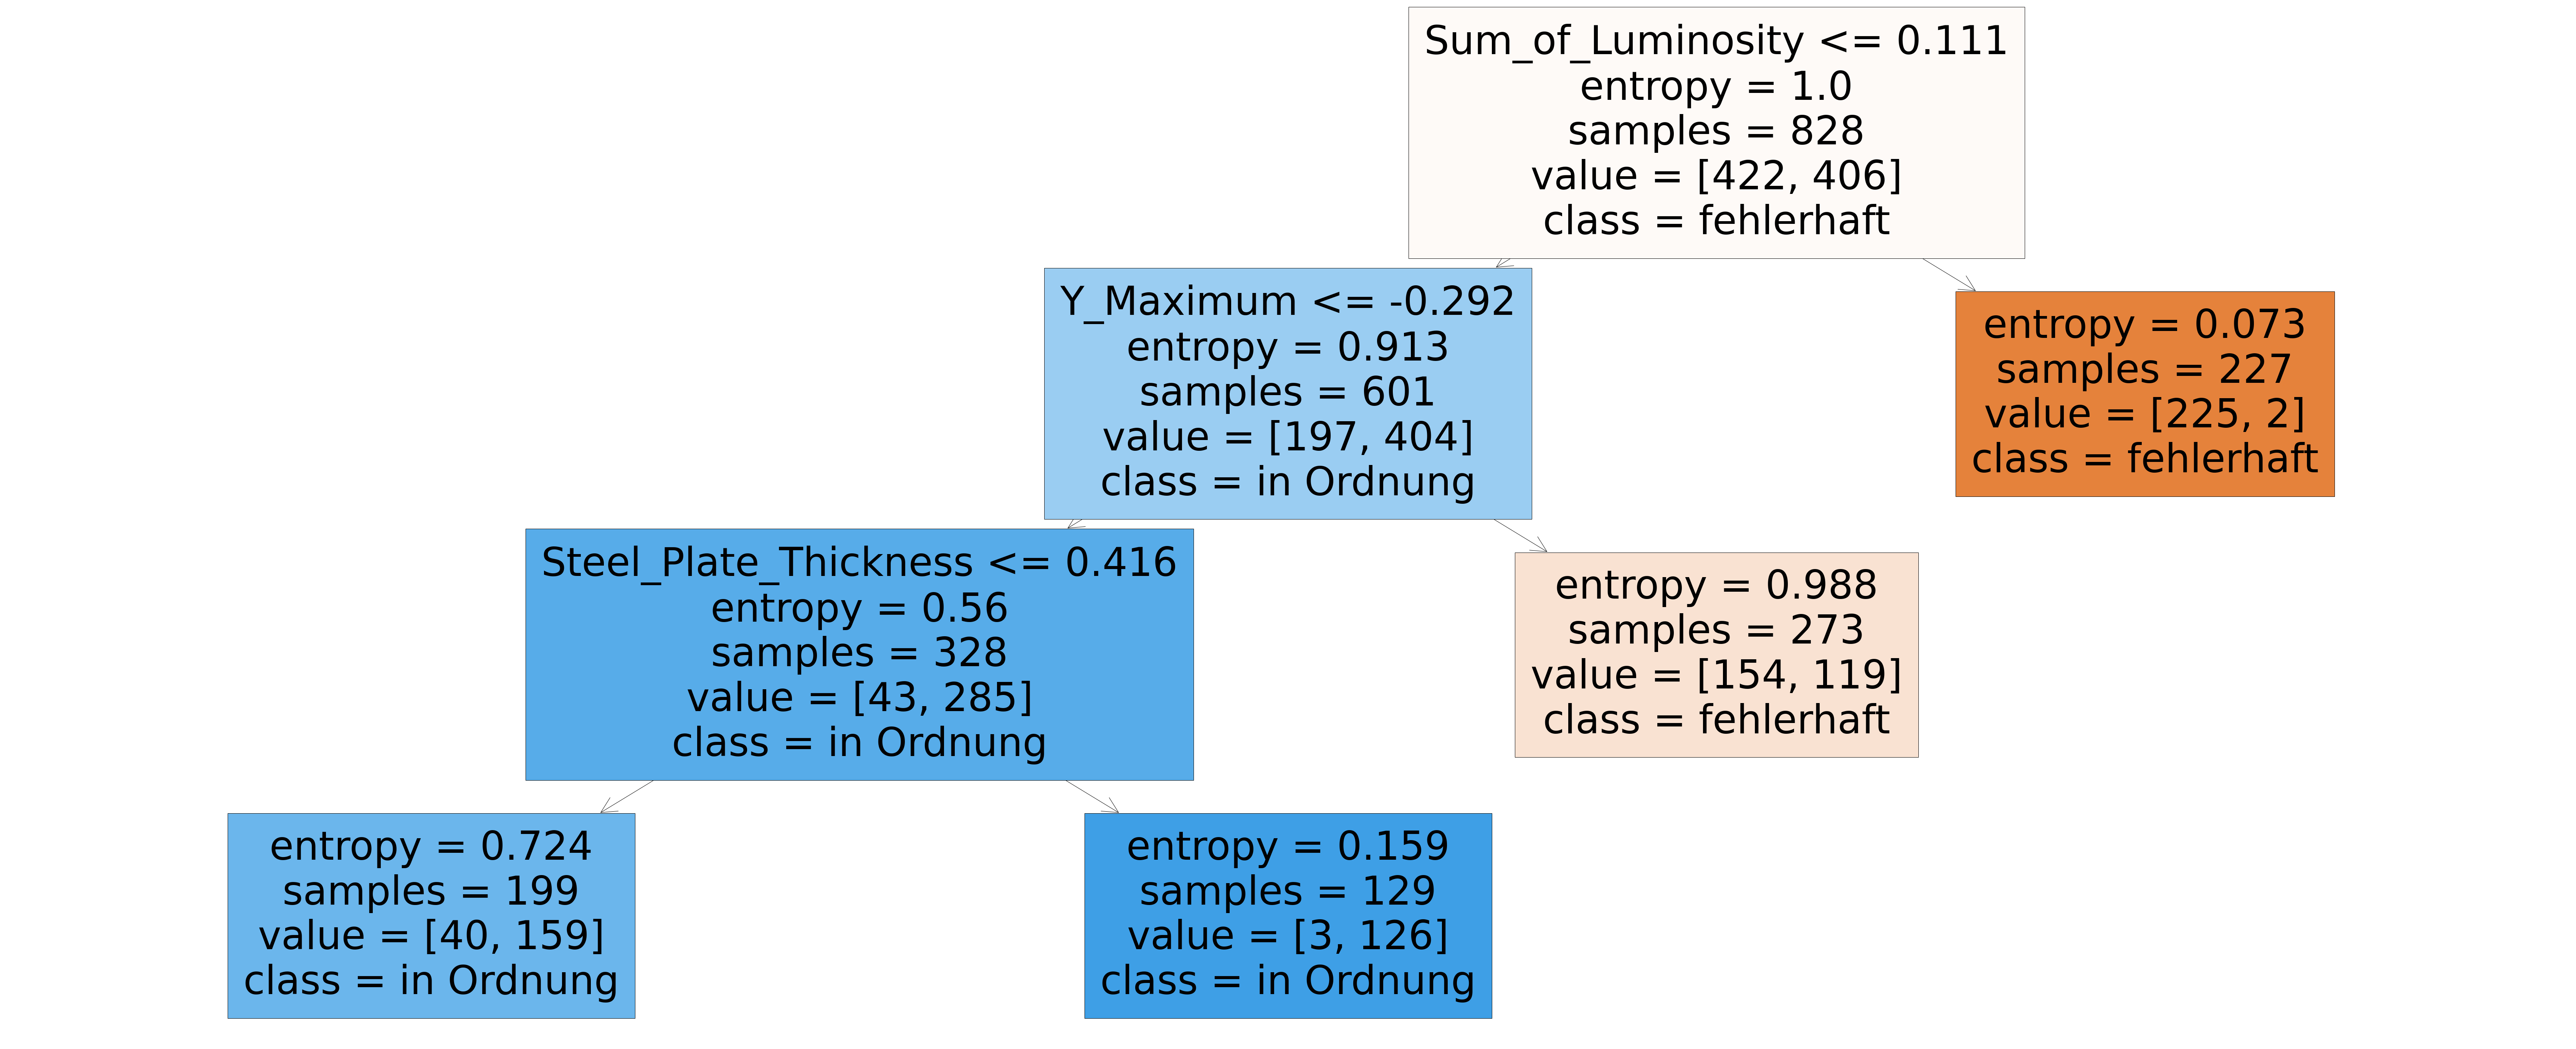

In [19]:
fig, ax = plt.subplots(figsize = (120, 50))
plot_tree(dt, class_names = dt.classes_, feature_names = features_sort[:10].Attributname.values, ax = ax, filled=True);

**Hier soll eine kurze Interpretation erfolgen (ca. 3 Sätze): welche Regeln Sie ableiten können und wie Sie den Entscheidungsbaum bewerten.**

Die folgenden Regeln sind chronologisch zu interpretieren:
  1. Wenn das Feature _Sum_of_Luminosity_ (Leuchtkraft) einen Wert **größer 0.111** aufweist, ist die Stahlplatte **fehlerhaft**. Sonst müssen weitere Parameter betrachtet werden.
  2. Wenn das Feature _Y_Maximum_ einen Wert **größer -0.292** aufweist, ist die Stahlplatte **fehlerhaft**. Sonst nicht.
  3. Die Aufteilung des Baumes in Knoten Tiefe 3 hat keine Aussagekraft mehr, da unabhängig von der Ausprägung des Features _Steel_Plate_Thickness_ die Stahlplatten als "in Ordnung" eingestuft werden. Dennoch kann durch die Aufteilung die Entropie von 0.56 auf 0.724 und 0.159 reduziert werden.

**Bewertung des Entscheidungsbaums**

Aus den zuvor 10 ausgewählten Features werden in diesem Baum nur 3 Features dargestellt. Das liegt unter anderem an der Wahl der _min_impurity_decrease_ von 0.02. So werden keine weiteren Aufteilungen mehr unternommen, wenn sich der Entscheidungsbaum nicht wesentlich verbessert. Ein _min_impurity_decrease_ von 0.01 liefert einen wesentlich umfangreicheren Baum und gibt so auch Aussagen über die restlichen ausgewählten Features.

### Modellierung

In [20]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

SVM

In [21]:
svm = SVC()
svm.fit(X_train_select, y_train)
y_pred_svm = svm.predict(X_test_select)

kNN

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train_select, y_train)
y_pred_knn = knn.predict(X_test_select)

Random Forest

In [23]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_select, y_train)
y_pred_rf = rf.predict(X_test_select)

Naive Bayes

In [24]:
nb = GaussianNB()
nb.fit(X_train_select, y_train)
y_pred_nb = nb.predict(X_test_select)

### Hyperparameteroptimierung

Nehmen Sie eine Hyperparameteroptimierung vor für: k in KNN, C und gamma in SVM)

In [25]:
from sklearn.model_selection import GridSearchCV

#### kNN

In [26]:
params_knn = { 'n_neighbors' : [2,4,6,8,10]}

grid_searcher = GridSearchCV(knn, params_knn, cv=10)
grid_searcher.fit(X_train_select, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10]})

In [27]:
pd.DataFrame(grid_searcher.cv_results_).sort_values('mean_test_score',ascending=False)[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
4,{'n_neighbors': 10},0.843094,1
0,{'n_neighbors': 2},0.840655,2
1,{'n_neighbors': 4},0.834646,3
2,{'n_neighbors': 6},0.831076,4
3,{'n_neighbors': 8},0.827446,5


**Ergebnis:**
Der beste Wert für den Parameter des kNN für die Anzahl der zu verwendenden Nachbarn ist **10**

#### SVM

In [28]:
params_svm = {'C': [0.01, 0.1, 1, 10, 50],
              'gamma': [1,50,100,150,1000]}

In [29]:
grid_searcher = GridSearchCV(svm, params_svm, cv=3)
grid_searcher.fit(X_train_select, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50],
                         'gamma': [1, 50, 100, 150, 1000]})

In [30]:
pd.DataFrame(grid_searcher.cv_results_).sort_values('mean_test_score',ascending=False)[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
20,"{'C': 50, 'gamma': 1}",0.853865,1
15,"{'C': 10, 'gamma': 1}",0.851449,2
10,"{'C': 1, 'gamma': 1}",0.850242,3
5,"{'C': 0.1, 'gamma': 1}",0.816425,4
21,"{'C': 50, 'gamma': 50}",0.741546,5


**Ergebnis:**
Die besten Werte (aus der Parameterliste) für SVM sind Gamma=1 und c=50

Für eine Optimierung der Paramter sollte eine umfangreichere Parameterliste ausgewählt und der Algorithmus wiederholt werden.

## Finale Evaluierung

In [31]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

def evaluate_ergebnis(clf): 
    y_pred = clf.predict(X_test_select)
    scores = cross_val_score(clf, X_train_select, y_train, cv=10)    
    print('model accuracy %f' % accuracy_score(y_pred=y_pred, y_true=y_test))
    print('cross validation score %f' % scores.mean())
    plot_confusion_matrix(clf, X_test_select, y_test);

#### Evaluation kNN

In [32]:
# Paramaterwahl gemäß Hyperparameteroptimierung
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_select, y_train)

KNeighborsClassifier(n_neighbors=10)

model accuracy 0.836538
cross validation score 0.843094


C:\Users\Jens\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


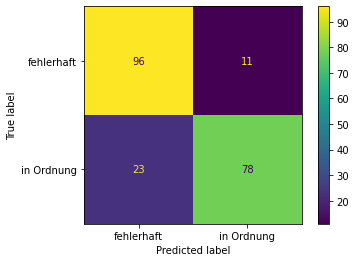

In [33]:
evaluate_ergebnis(knn)

#### Evaluation SVM 

In [34]:
# Paramaterwahl gemäß Hyperparameteroptimierung
svm = SVC(C=50, gamma=1)
svm.fit(X_train_select, y_train)

SVC(C=50, gamma=1)

model accuracy 0.841346
cross validation score 0.856318


C:\Users\Jens\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


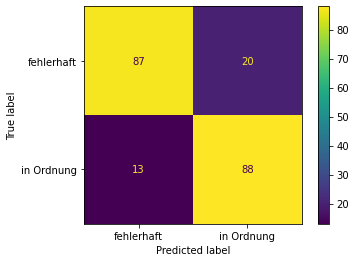

In [35]:
evaluate_ergebnis(svm)

#### Evaluation Entscheidungsbaum 

model accuracy 0.798077
cross validation score 0.793594


C:\Users\Jens\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


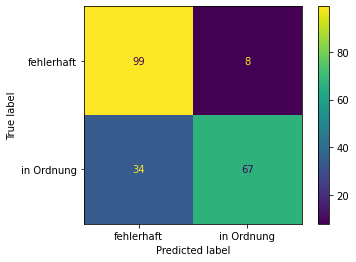

In [36]:
evaluate_ergebnis(dt)

#### Evaluation Random Forest 

model accuracy 0.894231
cross validation score 0.885307


C:\Users\Jens\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


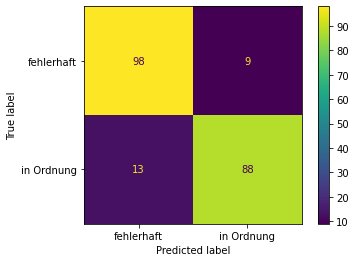

In [37]:
evaluate_ergebnis(rf)

#### Evaluation Naive Bayes

model accuracy 0.778846
cross validation score 0.757405


C:\Users\Jens\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


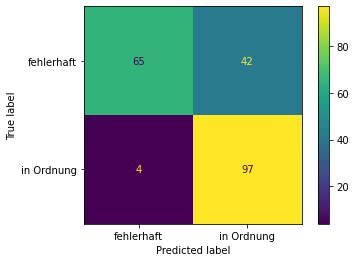

In [38]:
evaluate_ergebnis(nb)

#### Ergebnis 

Kurze Interpretation (ca. 3 Sätze): Welches halten Sie für das beste Modell? Wie würden Sie die Konfussionsmatrix bewerten? Überlegen Sie dabei genau, was bedeuten die False-Positives und False-Negatives im praktischen Einsatz dieses Modells.

In [39]:
data = [
    [0.836538, 0.843094],
    [0.841346, 0.856318],
    [0.798077, 0.793594],
    [0.894231, 0.885307],
    [0.778846, 0.757405]]
result = pd.DataFrame(data, columns = ['accuracy', 'cross validation'], index = ['kNN', 'SVM', 'Entscheidungsbaum', 'Random Forest', 'Naive Bayes'])
result

,accuracy,cross validation
kNN,0.836538,0.843094
SVM,0.841346,0.856318
Entscheidungsbaum,0.798077,0.793594
Random Forest,0.894231,0.885307
Naive Bayes,0.778846,0.757405


Wie in der Tabelle zu sehen, erzielt der **Random Forest Algoritmus** sowohl in der Accuracy (89.4%) als auch in der Cross_Validation (88.5%) mit cv=10 die besten Ergebnisse. Das liegt daran, dass der Random Forest Algorithmus die Ergebnisse vieler verschiedener Entscheidungsbäume nutzt, um bestmögliche Entscheidungen oder Vorhersagen zu treffen. Die Entscheidungsbäume wurden nach einem Zufallsprinzip unkorreliert erstellt.

Dieses Ergebnis spiegelt sich auch in der Konfusionsmatrix wieder. Hier lassen sich auch die Fehler 1.Art und Fehler 2.Art gut erkennen.

- **Fehler 1. Art** oder **False Positive** sind demnach Fälle in denen der Algorithmus für die Stahlplatten "fehlerhaft" vorhergesagt hat, wobei die Stahlplatten in Wirklichkeit in Ordnung waren. Das ist im Falle des Random Forests in 13 Fällen aufgetreten (unten links).

- **Fehler 2. Art** oder **False-Negative** sind Fälle in denen der Algorithmus für die Stahlplatte "in_Ordnung" vorhergesagt hat, wobei die Stahlplatte in Wirklichkeit fehlerhaft war. Das ist im Falle des Random Forests in 9 Fällen aufgetreten (oben rechts).

In einem Produktionsbetrieb ist ein Fehler 1.Art nicht weiter tragisch, da hier Stahlplatten aus der Produktion automatisch aussortiert werden die in Ordnung sind. Das kann manuell geprüft werden und die Stahlplatten können dennoch genutzt werden. Ein Fehler 2.Art ist hier gravierender, da fehlerhafte Teile nicht automatisch erkannt und aussortiert werden können und so in der Produktion weiterverwendet werden. Das kann zu erheblichen Kosten führen.

Der Entscheidungsbaum hat mit nur 8 Fällen einen besseren Wert für False-Negative erzielt. Für eine exate Analyse müsste neben der Accuracy auch die Precision betrachtet werden, bevor einer der untersuchten Algorithmen in einem Betrieb eingesetzt werden kann.